# Quantum Computing and Graph Theory - Classical Implementation

In [1]:
# Setup

import numpy as np
import matplotlib.pyplot as plt

### Graph Class Testing

In [2]:
from graph import Graph

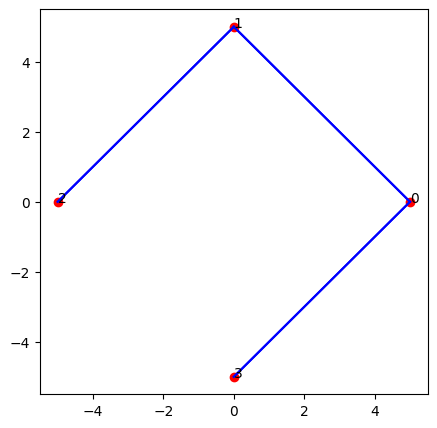

Bit string: 101100
Adjacency matrix:
 [[0 1 0 1]
 [1 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]
Edge sequence (sum of rows): [2 2 1 1]
Connectivity sequence (upper-triangle binary string value): [5. 2. 0. 0.]


In [4]:

example_graph = Graph(np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 0],
    [1, 0, 0, 0],
]))


example_graph.plot_graph(vertex_labels=True)
print("Bit string:", example_graph.to_bitstring())
print("Adjacency matrix:\n", example_graph.adj_matrix)
print("Edge sequence (sum of rows):", example_graph.get_edge_sequence())
print("Connectivity sequence (upper-triangle binary string value):", example_graph.get_connectivity_sequence())

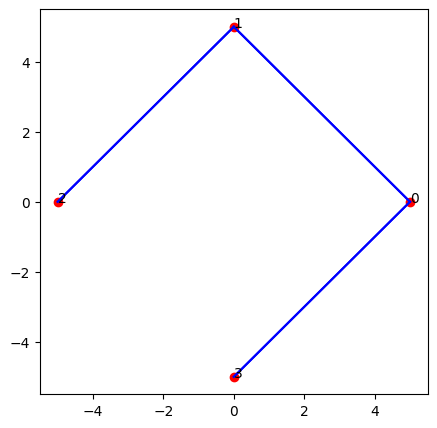

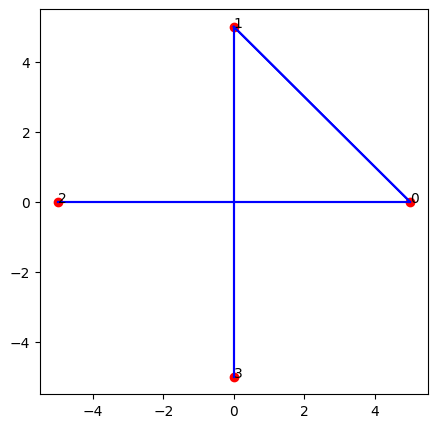

In [5]:
example_graph = Graph(np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 0],
    [1, 0, 0, 0],
]))

example_graph.plot_graph(vertex_labels=True)
example_graph.permute(2,3)
example_graph.plot_graph(vertex_labels=True)

### Generating the set of Non-Homomorphic Graphs of size $n$

In [ ]:
graph_size = 3

H = []
H.append(Graph(np.zeros((graph_size, graph_size)))) # The empty graph
H.append(Graph(np.ones((graph_size, graph_size)))) # The complete graph

for h in H:
    print(h.to_bitstring())

0.00.00.0
1.01.01.0
